In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Reads IMB data from Christian Haas and Melinda Webster.  There are two types of files: snow depth files that contain just snow depth and IMB files that contain air temperature, surface pressure, snow depth, ice thickness and ice temperature profiles.

In [5]:
import pandas as pd
import xarray as xr
import os
import re
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [44]:
diri = '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB'
#fileList = glob.glob(os.path.join(diri,'[0-9][0-9][0-9][0-9][A-Z].csv'))
fileList = [os.path.join(diri, re.search('\d{4}[A-Z]+\.csv', fn).group()) for fn in glob.glob(os.path.join(diri,'*.csv')) 
            if re.search('\d{4}[A-Z]+\.csv', fn) ]

In [45]:
print (fileList)

['/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2005F.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2005A.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2001A.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2014I.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2013B.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2006D.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2006C.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2012J.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2007B.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2015A.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2007E.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/2012D.csv', '/disks/sidads_ftp/pub/projects/SIPN/Snow_on_Seaice/in_situ/IMB/1997D.csv', '/disks/sid

In [64]:
df = pd.read_csv(fileList[0], header=0, index_col='Position Date')
df.head()

,Latitude (N),Longitude (E),Snow Depth (cm)
Position Date,,,
03-Sep-2005 08:01:00,85.978,197.768,0.0
03-Sep-2005 08:58:00,85.982,197.764,NaN
03-Sep-2005 09:11:00,85.982,197.765,NaN
03-Sep-2005 09:17:00,85.983,197.755,NaN
03-Sep-2005 09:42:00,85.983,197.741,0.0


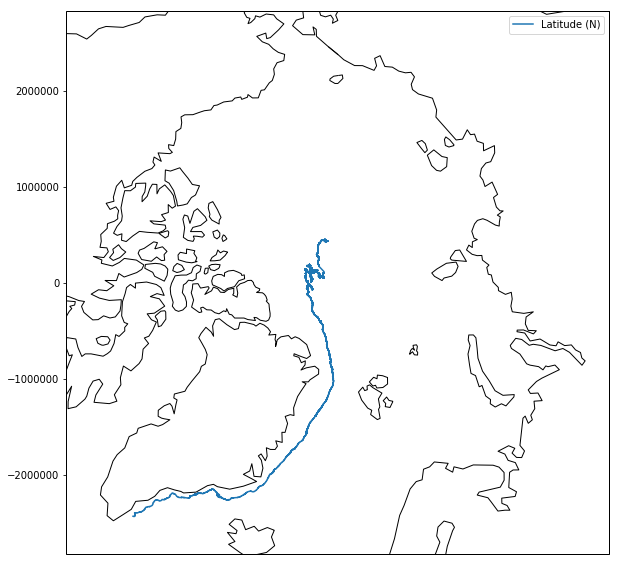

In [61]:
fig = plt.figure(1, figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())

ax.set_extent([-180.,180.,65.,90.], ccrs.PlateCarree())
ax.coastlines()

df.plot('Longitude (E)', 'Latitude (N)', ax=ax, transform=ccrs.PlateCarree())

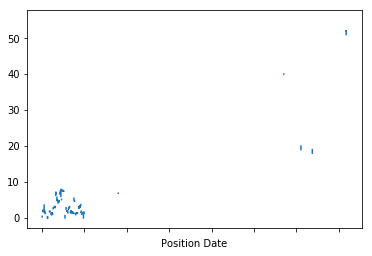

In [62]:
df['Snow Depth (cm)'].plot()